# CelebA EDA

In [3]:
import numpy as np
import pandas as pd  
import os
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

In [4]:
def get_annotation(fnmtxt, columns=None, verbose=True):
    if verbose:
        print("_"*70)
        print(fnmtxt)
    
    rfile = open(fnmtxt, 'r' ) 
    texts = rfile.readlines()
    rfile.close()
    
    if not columns:
        columns = np.array(texts[1].split(" "))
        columns = columns[columns != "\n"]
        texts = texts[2:]
    
    df = []
    for txt in texts:
        txt = np.array(txt.rstrip("\n").split(" "))
        txt = txt[txt != ""]
    
        df.append(txt)
        
    df = pd.DataFrame(df)

    if df.shape[1] == len(columns) + 1:
        columns = ["image_id"]+ list(columns)
    df.columns = columns   
    df = df.dropna()
    if verbose:
        print(" Total number of annotations {}\n".format(df.shape))
        print(df.head())
    ## cast to integer
    for nm in df.columns:
        if nm != "image_id":
            df[nm] = pd.to_numeric(df[nm],downcast="integer")
    return(df)

attr = get_annotation("../data/celeba/list_attr_celeba.txt", verbose=False)

In [5]:
attr

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [6]:
columns = []
for index, attribute_name in enumerate(attr.columns[1:]):
    columns.append(attribute_name)
    print(f"{index}: {attribute_name}")

0: 5_o_Clock_Shadow
1: Arched_Eyebrows
2: Attractive
3: Bags_Under_Eyes
4: Bald
5: Bangs
6: Big_Lips
7: Big_Nose
8: Black_Hair
9: Blond_Hair
10: Blurry
11: Brown_Hair
12: Bushy_Eyebrows
13: Chubby
14: Double_Chin
15: Eyeglasses
16: Goatee
17: Gray_Hair
18: Heavy_Makeup
19: High_Cheekbones
20: Male
21: Mouth_Slightly_Open
22: Mustache
23: Narrow_Eyes
24: No_Beard
25: Oval_Face
26: Pale_Skin
27: Pointy_Nose
28: Receding_Hairline
29: Rosy_Cheeks
30: Sideburns
31: Smiling
32: Straight_Hair
33: Wavy_Hair
34: Wearing_Earrings
35: Wearing_Hat
36: Wearing_Lipstick
37: Wearing_Necklace
38: Wearing_Necktie
39: Young


In [7]:
for colnm in attr.columns:
    if colnm != "image_id":
        print(" {:20} {:5.2f}%".format(
                colnm,100*np.mean(attr[colnm] == 1)))

 5_o_Clock_Shadow     11.11%
 Arched_Eyebrows      26.70%
 Attractive           51.25%
 Bags_Under_Eyes      20.46%
 Bald                  2.24%
 Bangs                15.16%
 Big_Lips             24.08%
 Big_Nose             23.45%
 Black_Hair           23.93%
 Blond_Hair           14.80%
 Blurry                5.09%
 Brown_Hair           20.52%
 Bushy_Eyebrows       14.22%
 Chubby                5.76%
 Double_Chin           4.67%
 Eyeglasses            6.51%
 Goatee                6.28%
 Gray_Hair             4.19%
 Heavy_Makeup         38.69%
 High_Cheekbones      45.50%
 Male                 41.68%
 Mouth_Slightly_Open  48.34%
 Mustache              4.15%
 Narrow_Eyes          11.51%
 No_Beard             83.49%
 Oval_Face            28.41%
 Pale_Skin             4.29%
 Pointy_Nose          27.74%
 Receding_Hairline     7.98%
 Rosy_Cheeks           6.57%
 Sideburns             5.65%
 Smiling              48.21%
 Straight_Hair        20.84%
 Wavy_Hair            31.96%
 Wearing_Earri

In [8]:
frequencies = (attr.iloc[:,1:] == 1).mean(axis=0).sort_values()
print(len(frequencies))

40


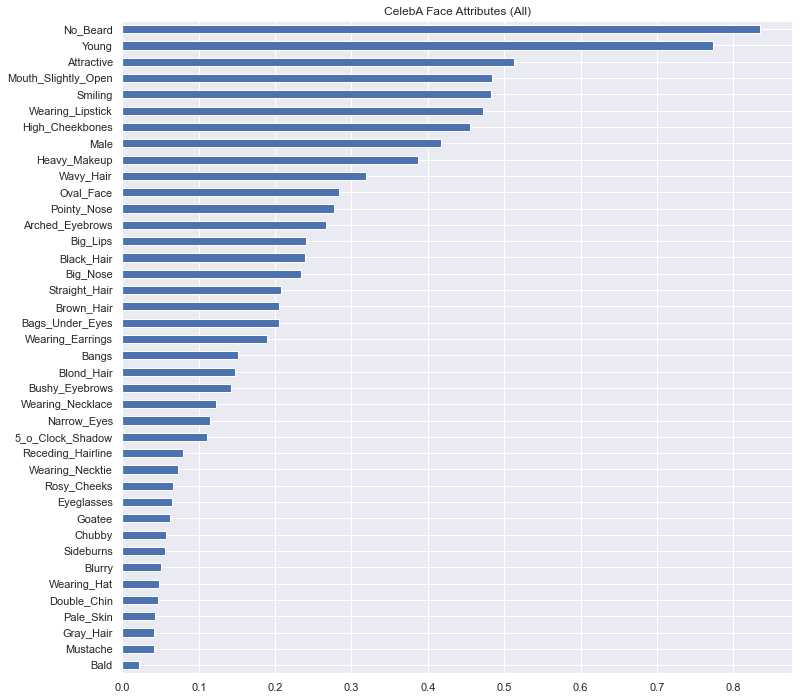

In [9]:
_ = frequencies.plot(title='CelebA Face Attributes (All)', 
                     kind='barh', 
                     figsize=(12, 12))
                     #color='m')

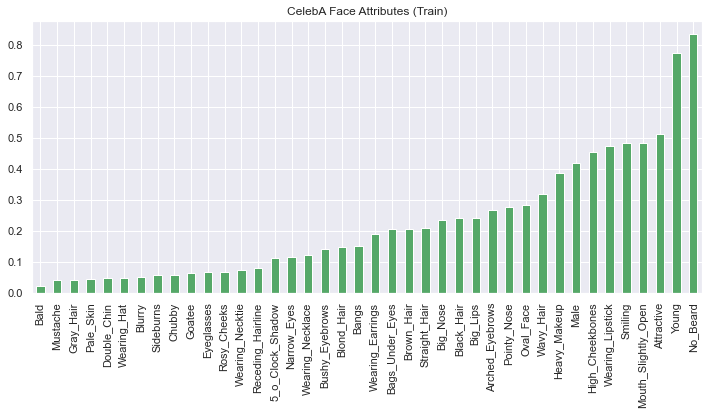

In [12]:
_ = frequencies.plot(title='CelebA Face Attributes', 
                     kind='bar', figsize=(12, 5), color='g')

In [10]:
train_attr = get_annotation("../data/celeba/train_attr_list.txt", columns = columns, verbose=False)
val_attr = get_annotation("../data/celeba/val_attr_list.txt", columns = columns, verbose=False)
test_attr = get_annotation("../data/celeba/test_attr_list.txt", columns = columns, verbose=False)
stat_df = pd.DataFrame(index = columns) #, columns = ['Full','Train','Val','Test'])
stat_df.loc[:,'Full'] = (attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Train'] = (train_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Val'] = (val_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Test'] = (test_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df

,Full,Train,Val,Test
5_o_Clock_Shadow,11.113579,11.167291,11.803493,9.988979
Arched_Eyebrows,26.698059,26.588438,25.841848,28.444044
Attractive,51.250500,51.362659,52.005839,49.584210
Bags_Under_Eyes,20.457159,20.446028,20.742941,20.263501
Bald,2.244335,2.281133,2.068757,2.119026
Bangs,15.157528,15.165571,14.672573,15.574592
Big_Lips,24.079586,24.091049,15.321891,32.702134
Big_Nose,23.453225,23.555323,24.880455,21.200281
Black_Hair,23.925093,23.902439,20.858710,27.161607
Blond_Hair,14.799185,14.908767,15.382292,13.325318


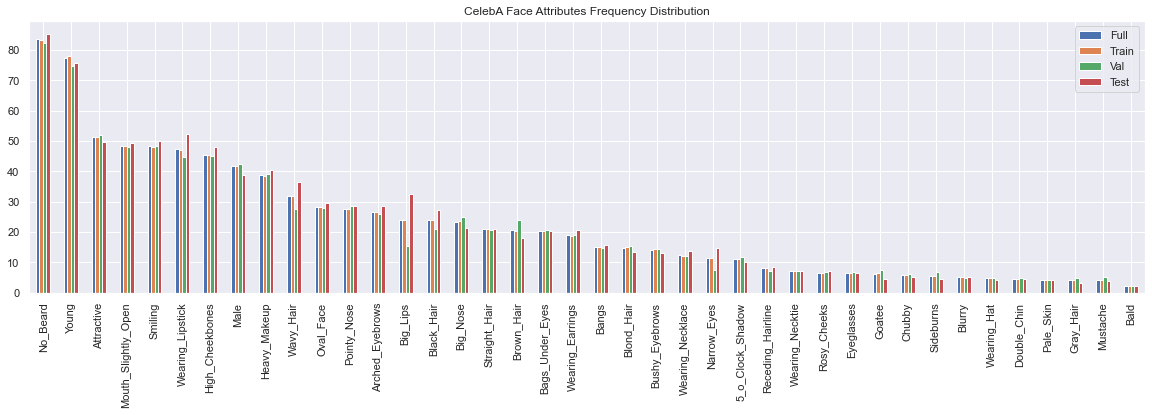

In [23]:
# with sns.axes_style('white'):
stat_df = stat_df.sort_values('Full', ascending=False)
stat_df.plot(title='CelebA Face Attributes Frequency Distribution', 
             kind='bar', figsize=(20, 5))
plt.savefig('freq_dis.jpg', dpi=160, bbox_inches='tight')